In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression 
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [2]:
df_1 = pd.read_csv('user1_data.csv')
df_2 = pd.read_csv('user2_data.csv')

In [4]:
X = df_1.drop(['sm','ttime'],axis=1)
y = df_1["sm"]

In [10]:
# Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

## Plots
# plt.scatter(y_test,predictions)

#  Evaluation Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 1746.1936176175564
Root Mean Squared Error: 1931.6974186003265


In [11]:
# LGBM Regressor

from lightgbm import LGBMRegressor

horizon = 25
    
X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


model = LGBMRegressor(random_state=42)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 12.180156944162222
Mean Squared Error: 15.210097486008056


In [12]:
# model.predict()
# 
# 
abs(model.predict(X)-y)


0        2538.963190
1        2375.408312
2        2496.408312
3        2496.408312
4         210.806313
            ...     
19336       5.952427
19337       4.952427
19338       5.952427
19339       5.952427
19340       4.937987
Name: sm, Length: 19341, dtype: float64

In [13]:
## PLSRegression

from sklearn.cross_decomposition import PLSRegression 
model = PLSRegression(n_components=4)

horizon = 25

X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]

model.fit(X_train,y_train)
predictions=model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Absolute Error: 1414.0793595542036
Mean Squared Error: 1425.5525297354152


In [14]:
# Random Forest

from sklearn.model_selection import train_test_split


X = df_1.drop(['sm','ttime'], axis=1)
y = df_1['sm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)
predictions = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))


Mean Absolute Error: 384.6741005487055
Mean Squared Error: 647.3186565621697


In [65]:
# # Neural Network
# # import tensorflow as tf
# # print("Importing ...")
# # print("Imported")

# # Normalize the data

# X = df_2.drop(['sm','ttime'], axis=1)
# y = df_2['sm']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# x_train = tf.keras.utils.normalize(X_train , axis=1)
# x_test = tf.keras.utils.normalize(X_test , axis=1)

# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(15,activation='relu'))

# model.add(tf.keras.layers.Dense(30,activation='relu'))

# model.add(tf.keras.layers.Dense(25,activation='relu'))

# model.add(tf.keras.layers.Dense(1,activation='relu'))

# model.compile(loss='mse',optimizer='adam')

# model.fit(x_train,y_train,epochs = 250)

# model.save('soil.model')

In [319]:
model = tf.keras.models.load_model('soil.model')
# loss, accuracy = model.evaluate(X_test,y_test)

In [435]:
model.evaluate(x_test,y_test)

In [141]:
 df_1.columns[1:]

# [0,1,2,3,5,6]

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [5]:
# LSTM 


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,6,5]
no_of_features= len(input_fetaure_index)
target_index = 5
in_days=40

In [6]:
df = df_2.drop('ttime',axis=1)

fraction = math.ceil(len(df) * .75)

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(df)

train_data = scaled_data[0:fraction , : ]

In [7]:
#Splitting the data
x_train=[]
y_train = []
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])

In [8]:
# x_train

In [9]:
#Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into 3-D array
# x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],no_of_features))    

In [10]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.1))

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.1))

# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# model.add(Dropout(0.2))

model.add(LSTM(units = 10))
model.add(Dropout(0.1))

model.add(Dense(1, activation='relu6'))



In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
model.fit(x_train, y_train, epochs =2, batch_size = 1000)

Epoch 1/2
16/16 [==============================] - 4s 272ms/step - loss: 0.0327
Epoch 2/2
16/16 [==============================] - 4s 222ms/step - loss: 0.0285


In [15]:
#Test data set
test_data = scaled_data[fraction-1: , : ]
#splitting the x_test and y_test data sets
x_test = []
y_test = df_2.drop('ttime',axis=1)['sm'].to_numpy()[fraction+in_days-1 : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])
# #Convert x_test to a numpy array
x_test = np.array(x_test)
# #Reshape the data into 3-D array
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))
# print(x_test.shape, y_test.shape)


In [ ]:
arr = x_test 
arr.shape

In [140]:
scaled_data.shape[0]-fraction


5041

In [141]:
x_test.shape

(5002, 40, 4)

In [142]:
x_test.shape

(5002, 40, 4)

In [16]:

#check predicted values
predictions = model.predict(x_test)
# # Undo scaling
temp = df_2.drop('ttime', axis=1).values
predictions = np.concatenate((temp[len(df_2)-len(predictions):, :target_index],predictions, temp[len(df_2)-len(predictions):, target_index+1:]), axis=1)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, target_index]


157/157 [==============================] - 4s 12ms/step


In [144]:
predictions.shape


(5002,)

In [145]:
predictions.shape

(5002,)

In [146]:
y_test.shape

(5002,)

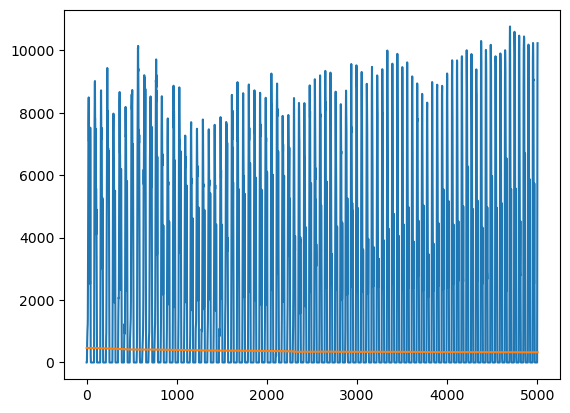

In [147]:
plt.plot(predictions)
plt.plot(y_test)

In [22]:
predictions

array([ 500.46971492,  623.13046654,  731.54071806, ..., 2036.02029546,
       2845.62018844, 3696.18376605])

In [18]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))

Mean Squared Error: 3051.740970247594


In [19]:


df_2.columns[1:]

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'lum', 'temp', 'humd', 'pres'], dtype='object')

In [20]:
predictions

array([ 500.46971492,  623.13046654,  731.54071806, ..., 2036.02029546,
       2845.62018844, 3696.18376605])

In [423]:
# Proper LSTM

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[0,1,2,3]
no_of_features= len(input_fetaure_index)
target_index = 3
in_days=40

In [424]:
df = df_2.drop(['ttime', 'pm1',  'am', 'lum', 'humd','pres','sm'],axis=1)
df['sm']=df_2['sm']

fraction = math.ceil(len(df) * .75)
print(f"sample SET HAS {fraction}")


# scaler = MinMaxScaler(feature_range=(0, 1))

# scaled_data = scaler.fit_transform(df)
scaled_data =  df.to_numpy()
train_data = df.iloc[0:fraction , : ].to_numpy()
print(f"sample SET ShAPE {train_data.shape}")

sample SET HAS 15125
sample SET ShAPE (15125, 4)


In [425]:
scaled_data.shape

(20166, 4)

In [426]:
x_train=[]
y_train = []
i=in_days
for i in range(in_days, len(train_data)):
    x_train.append(train_data[i-in_days:i,input_fetaure_index])
    y_train.append(train_data[i,target_index])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [427]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units = in_days, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.1))

model.add(LSTM(units = 2*in_days, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
model.add(Dropout(0.1))

# model.add(LSTM(units = in_days, return_sequences = True, input_shape = (x_train.shape[1], no_of_features)))
# model.add(Dropout(0.2))

model.add(LSTM(units = 10))
model.add(Dropout(0.1))

model.add(Dense(1, activation='relu'))


In [428]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =60, batch_size = 3500)

Epoch 1/60
5/5 [==============================] - 13s 1s/step - loss: 37636152.0000
Epoch 2/60
5/5 [==============================] - 9s 2s/step - loss: 37626800.0000
Epoch 3/60
5/5 [==============================] - 9s 2s/step - loss: 37618212.0000
Epoch 4/60
5/5 [==============================] - 9s 2s/step - loss: 37612576.0000
Epoch 5/60
5/5 [==============================] - 6s 927ms/step - loss: 37608252.0000
Epoch 6/60
5/5 [==============================] - 9s 2s/step - loss: 37604424.0000
Epoch 7/60
5/5 [==============================] - 10s 2s/step - loss: 37601304.0000
Epoch 8/60
5/5 [==============================] - 10s 2s/step - loss: 37598832.0000
Epoch 9/60
5/5 [==============================] - 9s 2s/step - loss: 37596964.0000
Epoch 10/60
5/5 [==============================] - 6s 991ms/step - loss: 37595500.0000
Epoch 11/60
5/5 [==============================] - 6s 1s/step - loss: 37594300.0000
Epoch 12/60
5/5 [==============================] - 6s 1s/step - loss: 375932

In [429]:
scaled_data.shape

(20166, 4)

In [430]:
y_train.shape

(15085,)

In [431]:
#Test data set
test_data = scaled_data[fraction-1: , : ]
#splitting the x_test and y_test data sets
x_test = []
y_test = df['sm'].to_numpy()[fraction+in_days-1 : ]
for i in range(in_days,len(test_data)):
    x_test.append(test_data[i-in_days:i,input_fetaure_index])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],no_of_features))



In [432]:
ar = x_test
ar.shape

(5002, 40, 4)

In [433]:
x_test

array([[[  1.67,  37.43,  28.9 , 469.  ],
        [  1.67,  37.43,  29.23, 469.  ],
        [  1.67,  37.43,  29.35, 468.  ],
        ...,
        [  1.11,  36.32,  17.69, 466.  ],
        [  1.67,  36.32,  17.04, 466.  ],
        [  1.67,  36.32,  16.96, 466.  ]],

       [[  1.67,  37.43,  29.23, 469.  ],
        [  1.67,  37.43,  29.35, 468.  ],
        [  1.67,  37.43,  29.65, 468.  ],
        ...,
        [  1.67,  36.32,  17.04, 466.  ],
        [  1.67,  36.32,  16.96, 466.  ],
        [  1.67,  36.32,  17.18, 466.  ]],

       [[  1.67,  37.43,  29.35, 468.  ],
        [  1.67,  37.43,  29.65, 468.  ],
        [  1.67,  37.43,  29.56, 468.  ],
        ...,
        [  1.67,  36.32,  16.96, 466.  ],
        [  1.67,  36.32,  17.18, 466.  ],
        [  1.67,  36.88,  17.22, 465.  ]],

       ...,

       [[  1.11,  27.38,  35.63, 327.  ],
        [  1.11,  27.38,  35.49, 327.  ],
        [  1.11,  27.38,  35.02, 328.  ],
        ...,
        [  1.11,  27.38,  24.7 , 326.  ],
     

In [434]:
scaled_data[fraction-1:]

array([[  1.67,  37.43,  28.9 , 469.  ],
       [  1.67,  37.43,  29.23, 469.  ],
       [  1.67,  37.43,  29.35, 468.  ],
       ...,
       [  1.11,  27.38,  30.07, 327.  ],
       [  1.67,  27.93,  31.55, 327.  ],
       [  1.67,  27.93,  32.68, 328.  ]])

In [435]:

predictions = model.predict(x_train)

# temp = df.values
# predictions = np.concatenate((temp[len(df_2)-len(predictions):, :target_index],predictions, temp[len(df_2)-len(predictions):, target_index+1:]), axis=1)
pred = np.concatenate((temp[fraction+in_days-1:,:-1],predictions),axis=1)
predictions = scaler.inverse_transform(pred)
predictions = predictions[:, target_index]

472/472 [==============================] - 9s 15ms/step


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5002 and the array at index 1 has size 15085

In [ ]:
predictions

In [ ]:
y_test

In [2]:
# LSTM 


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

input_fetaure_index=[2,4,5]
no_of_features= len(input_fetaure_index)
target_index = 4
in_days=20
